# Predicting SyriaTel Customer Churn

## Business Understanding

### Overview

SyriaTel is a telecommunication company interested to know how they can keep customers around for long. Customer churn refers to the loss of customers over a specific period. Building a classifier to predict customer churn will help SyriaTel keep their customers.

### Challenges

1. Understanding customer behaviour and to avoid churning

2. Understanding the needs of customers so as to provide them with quality services and avoid churning

3. Understanding the data provided so as to build reliable predictive models

### Problem Statement

Customer churn poses a significant challenge to service providers, impacting revenue streams and hindering long-term sustainability. Syria Tel needs a predictive model to proactively identify and address factors contributing to customer churn 

### Objectives

1. To gather the correct to ensure effective results

2. To build and train data for analysis

3. To buld the right predictive models and asses its perfomance 

### Proposed Solution

To buld the right predictive models for SyriaTel to predict factors contributing to customer churn based on historical data and improve on all areas

### Conclusion

By using the historical data provided, SyriaTel can benefit a lot by predicting tne factors that will lead to customer churn and turn it all around make profits.

## Data Understanding

## Import relevant libraries and packages

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.impute import SimpleImputer

# Handling Class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# To ensure a more organized and tidy output, we suppress potential warnings that may arise during the execution of the code.
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

The next step in our analysis involves opening the Syria Tel data file using pandas. By examining the first five rows of the dataset, we aim to gain an initial understanding of its structure and the information it contains.

In [402]:
dataset = pd.read_csv('customer_churn.csv')
dataset.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [403]:
# Function to print the shape of the DataFrame
def data_shape(dataset):
    print("Data Shape:")
    print(f"Number of Rows: {dataset.shape[0]}")
    print(f"Number of Columns: {dataset.shape[1]}\n")

# Function to display information about the data
def data_info(dataset):
    print("Dataset Information:")
    print(dataset.info())

# Function to check for missing values
def data_missing(dataset):
    print("\nMissing Values:")
    print(dataset.isnull().sum())
# Function to identify and display duplicate rows
def identify_duplicates(dataset):
    duplicates = dataset[dataset.duplicated()]
    print("\nDuplicate Rows:")
    print(duplicates)
# Function to display descriptive statistics of numerical columns
def data_describe(dataset):
    print("\nDescriptive Statistics:")
    print(dataset.describe())

In [404]:
# Function to explore the dataset
def explore_dataset(dataset):
    data_shape(dataset)
    data_info(dataset)
    data_missing(dataset)
    identify_duplicates(dataset)
    data_describe(dataset)

In [405]:
# Call the fuction to explore the dataset
explore_dataset(dataset)

Data Shape:
Number of Rows: 3333
Number of Columns: 21

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minu

# Data Preparation

The dataset provided consists of 3333 records with 21 columns. Upon analyzing the dataset, I found out there are no missing values,duplicates. Data preparation can be done.

In [406]:
# converting string-based categorical values to integer-based categorical representations 0 and 1
intl_plan = {'yes':1,'no':0}
vm_plan = {'yes':1,'no':0}
churn_status = {True:1,False:0}

#Display the replacement of each column
dataset['international plan'].replace(intl_plan,inplace=True)
dataset['voice mail plan'].replace(vm_plan,inplace=True)
dataset['churn'].replace(churn_status,inplace=True)

In [407]:
dataset.sample(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
2178,WY,80,510,400-5389,0,0,0,101.1,121,17.19,...,110,22.37,137.7,74,6.20,7.3,5,1.97,0,0
280,MT,143,415,387-6440,0,0,0,172.3,97,29.29,...,108,14.79,188.2,119,8.47,13.0,4,3.51,2,0
2087,NE,105,408,327-6764,0,0,0,162.3,99,27.59,...,95,18.06,214.7,114,9.66,11.1,8,3.00,4,0
1647,MO,110,408,356-4558,0,0,0,222.7,94,37.86,...,98,8.99,214.8,78,9.67,13.5,4,3.65,1,0
896,VT,125,415,372-4722,0,0,0,126.7,113,21.54,...,131,13.22,206.2,112,9.28,14.4,7,3.89,2,0
1631,WI,133,510,380-3161,0,0,0,187.0,65,31.79,...,128,12.02,238.2,108,10.72,10.0,8,2.70,2,0
179,KS,70,408,411-4582,0,0,0,232.1,122,39.46,...,112,24.85,201.2,112,9.05,0.0,0,0.00,3,0
2424,MT,97,415,416-7013,0,1,15,117.6,97,19.99,...,126,16.69,157.4,113,7.08,6.4,3,1.73,1,0
2201,NY,116,510,346-4984,0,0,0,89.5,128,15.22,...,137,15.37,193.1,94,8.69,14.0,3,3.78,2,0
1299,UT,49,415,394-4520,0,0,0,266.3,90,45.27,...,117,17.66,205.0,98,9.23,14.0,2,3.78,2,1


There are no missing values / duplicates/outliers. We can proceed to EDA . I decided to rename some columns.

In [408]:
dataset.rename(columns=
    {
        "Int'l plan": "international plan",
        "VMail Plan": "voicemail plan",
        "number vmail messages": "voicemail messages",
        "total eve minutes": "total evening mins",
        "total eve calls": "total evening calls",
        "total eve charge": "total evening charge",
        "total intl minutes": "total international minutes",
        "total intl calls": "total international calls",
        "total intl charge": "total international charge",
    },
         inplace=True)
dataset

,state,account length,area code,phone number,international plan,voice mail plan,voicemail messages,total day minutes,total day calls,total day charge,...,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,0,1,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,370-3271,0,0,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,328-8230,0,0,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,364-6381,1,0,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


# Exploratory Data Analysis

## Univariate Analysis

Exploring the target variable

In [409]:
class_distribution = dataset['churn'].value_counts()
print(class_distribution)

churn
0    2850
1     483
Name: count, dtype: int64


In [410]:
class_distribution = dataset['churn'].value_counts(normalize = True)
print(class_distribution)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64


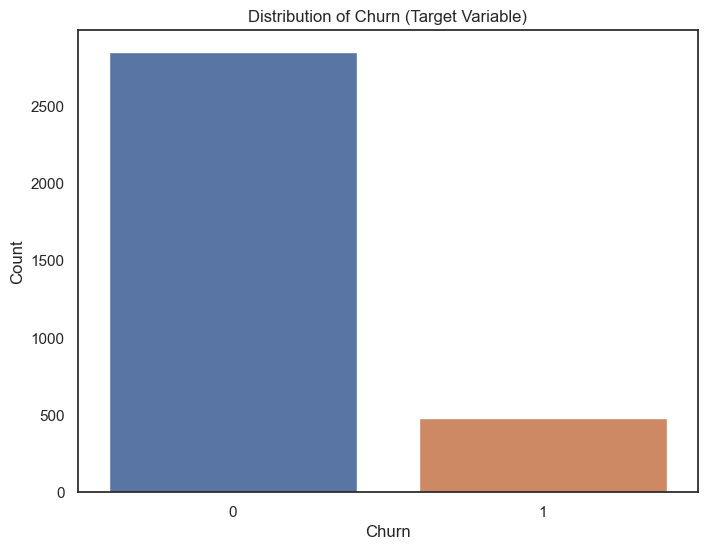

In [411]:
#Plot the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=dataset)
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


The countplot above indicates there is a class imbalance in the target variable. Further analysis to balance the class will be done.

# Bivariate Analysis

In [412]:
df1 = dataset.copy()
df1

,state,account length,area code,phone number,international plan,voice mail plan,voicemail messages,total day minutes,total day calls,total day charge,...,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,0,1,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,370-3271,0,0,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,328-8230,0,0,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,364-6381,1,0,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [413]:
#Dropping irrelevant columns
columns_to_drop = ['phone number', 'voice mail plan', 'voicemail messages']
df1.drop(columns=columns_to_drop, inplace=True,axis=1)
df1

,state,account length,area code,international plan,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


## To check effect of churn on total day charge

In [414]:
print("Maximum day charge:" , df1['total day charge'].max())

print("Manimum day charge:" , df1['total day charge'].min())
print("Average day charge:" , df1['total day charge'].mean())

Maximum day charge: 59.64
Manimum day charge: 0.0
Average day charge: 30.562307230723075


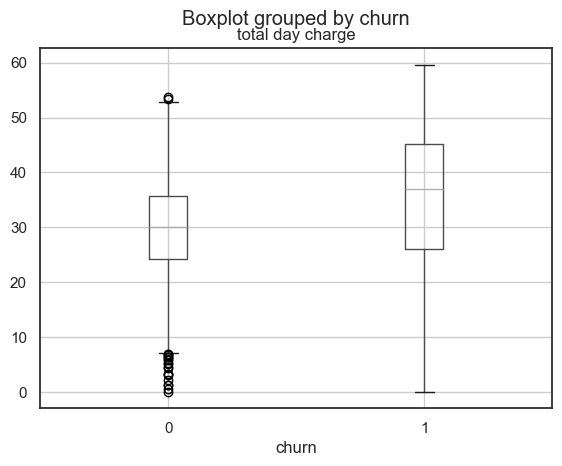

In [415]:
# plotting a boxplot to visualize total day charge by churn
df1.boxplot(column = 'total day charge', by = 'churn')
plt.show()

## To check effect of churn on total day calls on churn

In [416]:
print("Maximum day calls:" , df1['total day calls'].max())

print("Manimum day calls:" , df1['total day calls'].min())
print("Average day calls:" , df1['total day calls'].mean())

Maximum day calls: 165
Manimum day calls: 0
Average day calls: 100.43564356435644


The non churn customers have a mean of 100 calls. The mean for the churn customers is slightly higher. Customers who are likely to churn on average make more calls.

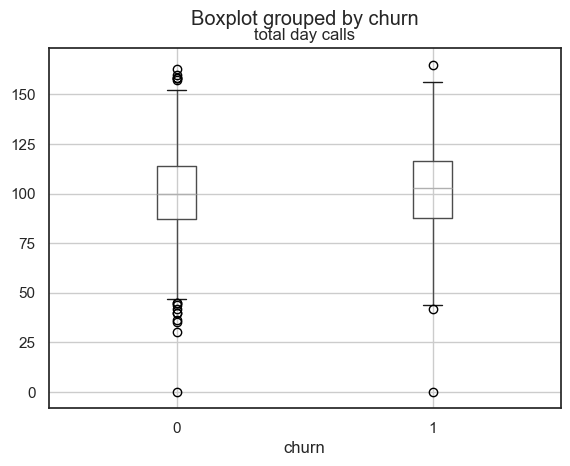

In [417]:
# plotting a boxplot to visualize total day calls by churn
df1.boxplot(column = 'total day calls', by = 'churn')
plt.show()

## To check effect of total day minutes on churn

In [418]:
print("Maximum day minutes:" , df1['total day minutes'].max())

print("Manimum day minutes:" , df1['total day minutes'].min())
print("Average day minutes:" , df1['total day minutes'].mean())

Maximum day minutes: 350.8
Manimum day minutes: 0.0
Average day minutes: 179.77509750975094


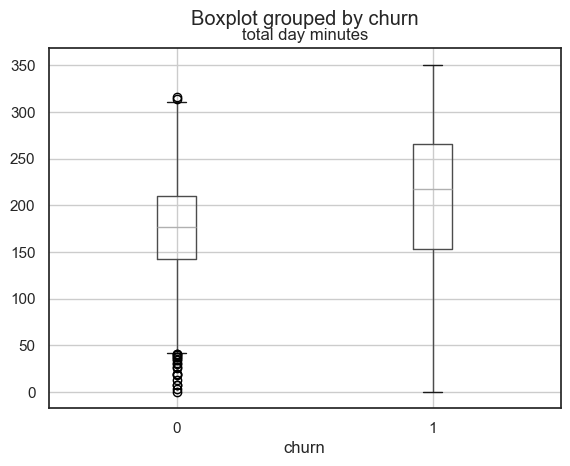

In [419]:
df1.boxplot(column = 'total day minutes', by = 'churn')
plt.show()

## To check effect account length on churn

In [420]:
print("Account length max is:" , df1['account length'].max())

print("Account length min is:" , df1['account length'].min())
print("Account length mean is:" , df1['account length'].mean())

Account length max is: 243
Account length min is: 1
Account length mean is: 101.06480648064806


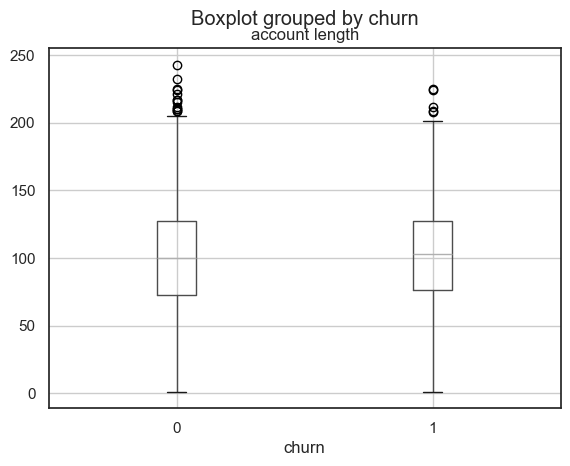

In [421]:
# plotting a boxplot to visualize account length by churn
df1.boxplot(column = 'account length', by = 'churn')
plt.show()

From the boxplot visualization, there seems to be no significant differences between the two groups. There is no significant difference in the customers who have churned and those who have not. Customers who have not churned are likely to have a longer account length.

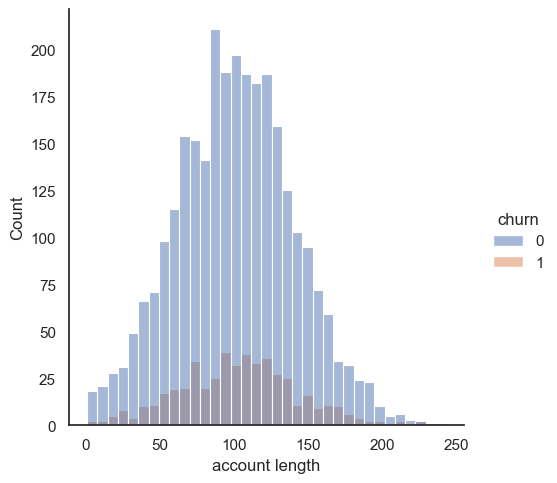

In [422]:
sns.displot(x="account length", data=df1, hue='churn');

From the histogram visualization, customers who are likely to churn are those who have held account with SyriaTel for shorter duration of time i.e., below the average of 100 days.

## To check effect of customer Service calls on churn

In [423]:
print("Maximum customer service calls:" , df1['customer service calls'].max())

print("Manimum customer service calls:" , df1['customer service calls'].min())
print("Average customer service calls:" , df1['customer service calls'].mean())

Maximum customer service calls: 9
Manimum customer service calls: 0
Average customer service calls: 1.5628562856285628


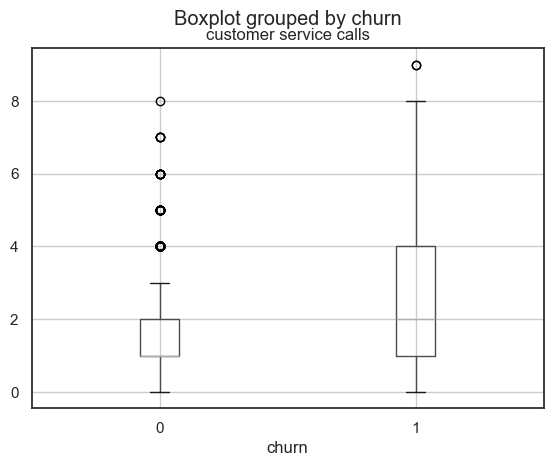

In [424]:
# plotting a boxplot to visualize customer service calls by churn
df1.boxplot(column = 'customer service calls', by = 'churn')
plt.show()

## To check rate of churn per state

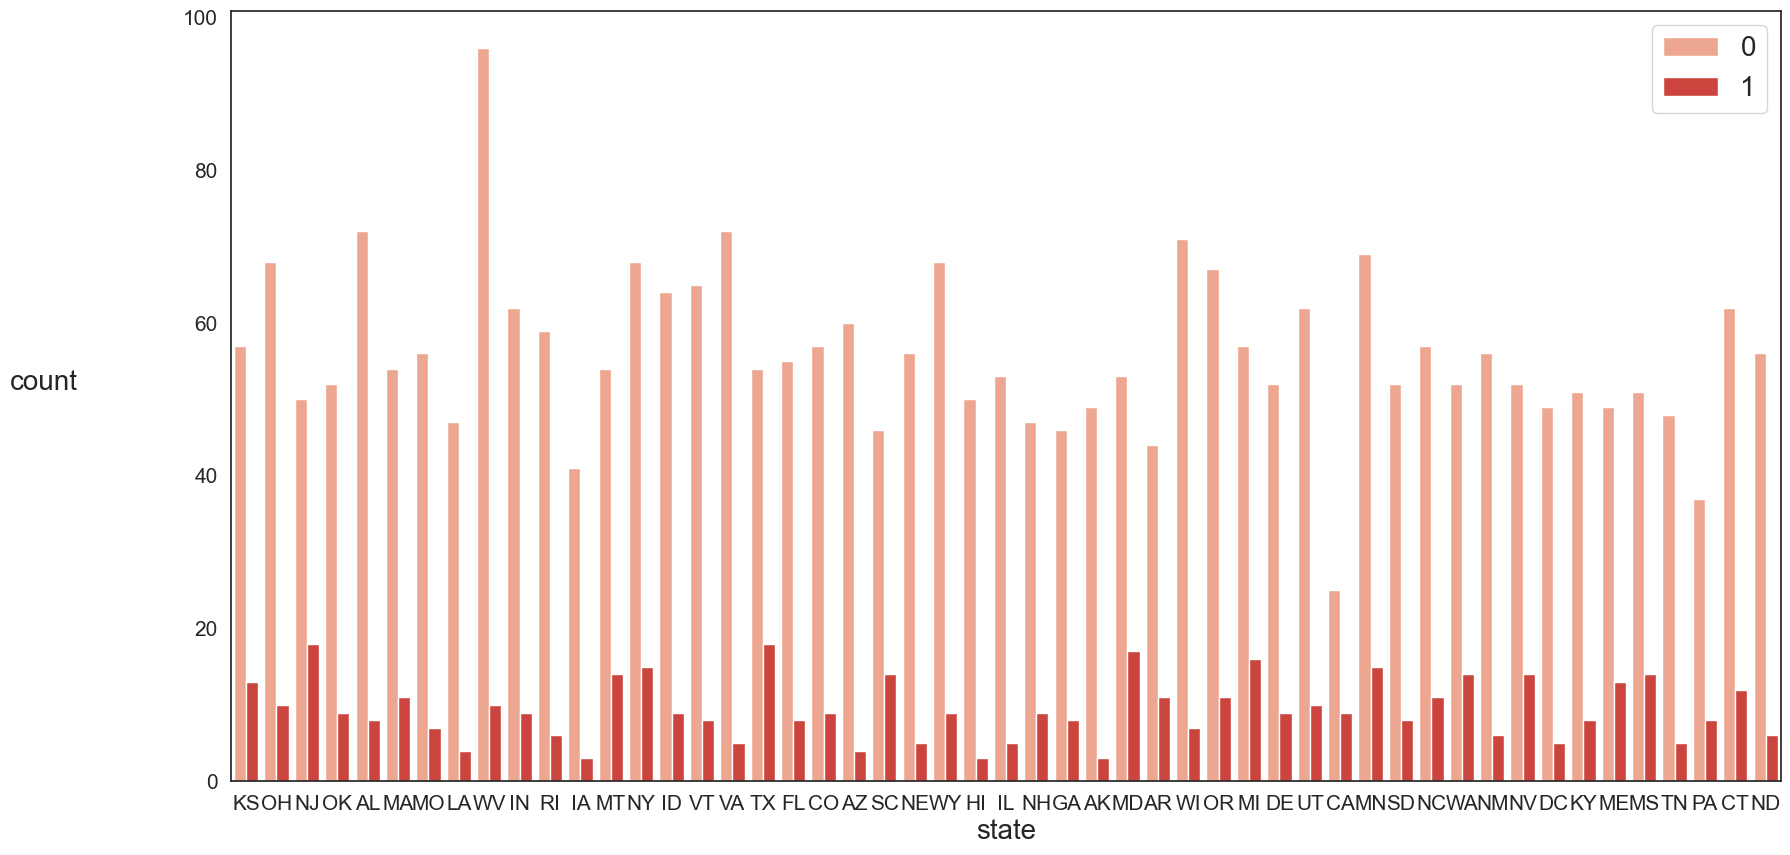

In [425]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='state', hue='churn', data=df1, palette='Reds')
ax.set_ylabel('count', rotation=0, labelpad=100,size=20)
ax.set_xlabel('state', size=20)
ax.legend(loc=0,fontsize=20);

ax.tick_params(labelsize=15)

From the countplot, there are some states with high churn rate we have to figure out the cause of the customer churn.They include New Jersey,Texas and Maryland.

# Modelling

## Prepare the dataset for modelling

In [426]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        3333 non-null   object 
 1   account length               3333 non-null   int64  
 2   area code                    3333 non-null   int64  
 3   international plan           3333 non-null   int64  
 4   total day minutes            3333 non-null   float64
 5   total day calls              3333 non-null   int64  
 6   total day charge             3333 non-null   float64
 7   total evening mins           3333 non-null   float64
 8   total evening calls          3333 non-null   int64  
 9   total evening charge         3333 non-null   float64
 10  total night minutes          3333 non-null   float64
 11  total night calls            3333 non-null   int64  
 12  total night charge           3333 non-null   float64
 13  total internationa

In [427]:
# Mapping of state abbreviations to numeric values
state_mapping = {'KS': 1, 'OH': 2, 'NJ': 3, 'OK': 4, 'AL': 5, 'MA': 6, 'MO': 7,'LA': 8, 'WV': 9, 'IN': 10, 'RI': 11,
       'IA': 12, 'MT': 13, 'NY': 14, 'ID': 15, 'VT':16, 'VA': 17, 'TX': 18, 'FL': 19, 'CO': 20, 'AZ': 21, 'SC': 22,
       'NE': 23, 'WY': 24, 'HI': 25, 'IL': 26, 'NH': 27, 'GA': 28, 'AK': 29, 'MD': 30, 'AR': 31, 'WI': 32, 'OR': 33,
       'MI': 34, 'DE': 35, 'UT': 36, 'CA': 37, 'MN': 38, 'SD': 39, 'NC': 40, 'WA': 41, 'NM': 42, 'NV': 43, 'DC': 44,
       'KY': 45, 'ME': 46, 'MS': 47, 'TN': 48, 'PA': 49, 'CT': 50, 'ND': 51}
# Apply the mapping to the 'state' column
df1['state_numeric'] = df1['state'].map(state_mapping)

# Drop the original 'state' column
df2 = df1.drop('state', axis=1)
df2.head()

,account length,area code,international plan,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn,state_numeric
0,128,415,0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,415,0,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,2
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,3
3,84,408,1,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,2
4,75,415,1,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,4


In [428]:
# Mapping of 'yes' to 1 and 'no' to 0
international_plan_mapping = {'yes': 1, 'no': 0}

# Apply the mapping to the 'international_plan' column
df2['international_plan_numeric'] = df2['international plan'].map(international_plan_mapping)

# Drop the original 'international_plan' column
df2 = df2.drop(columns=['international plan'])
df2.head()

,account length,area code,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn,state_numeric,international_plan_numeric
0,128,415,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,NaN
1,107,415,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,2,NaN
2,137,415,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,3,NaN
3,84,408,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,2,NaN
4,75,415,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,4,NaN


## Correlation Matrix

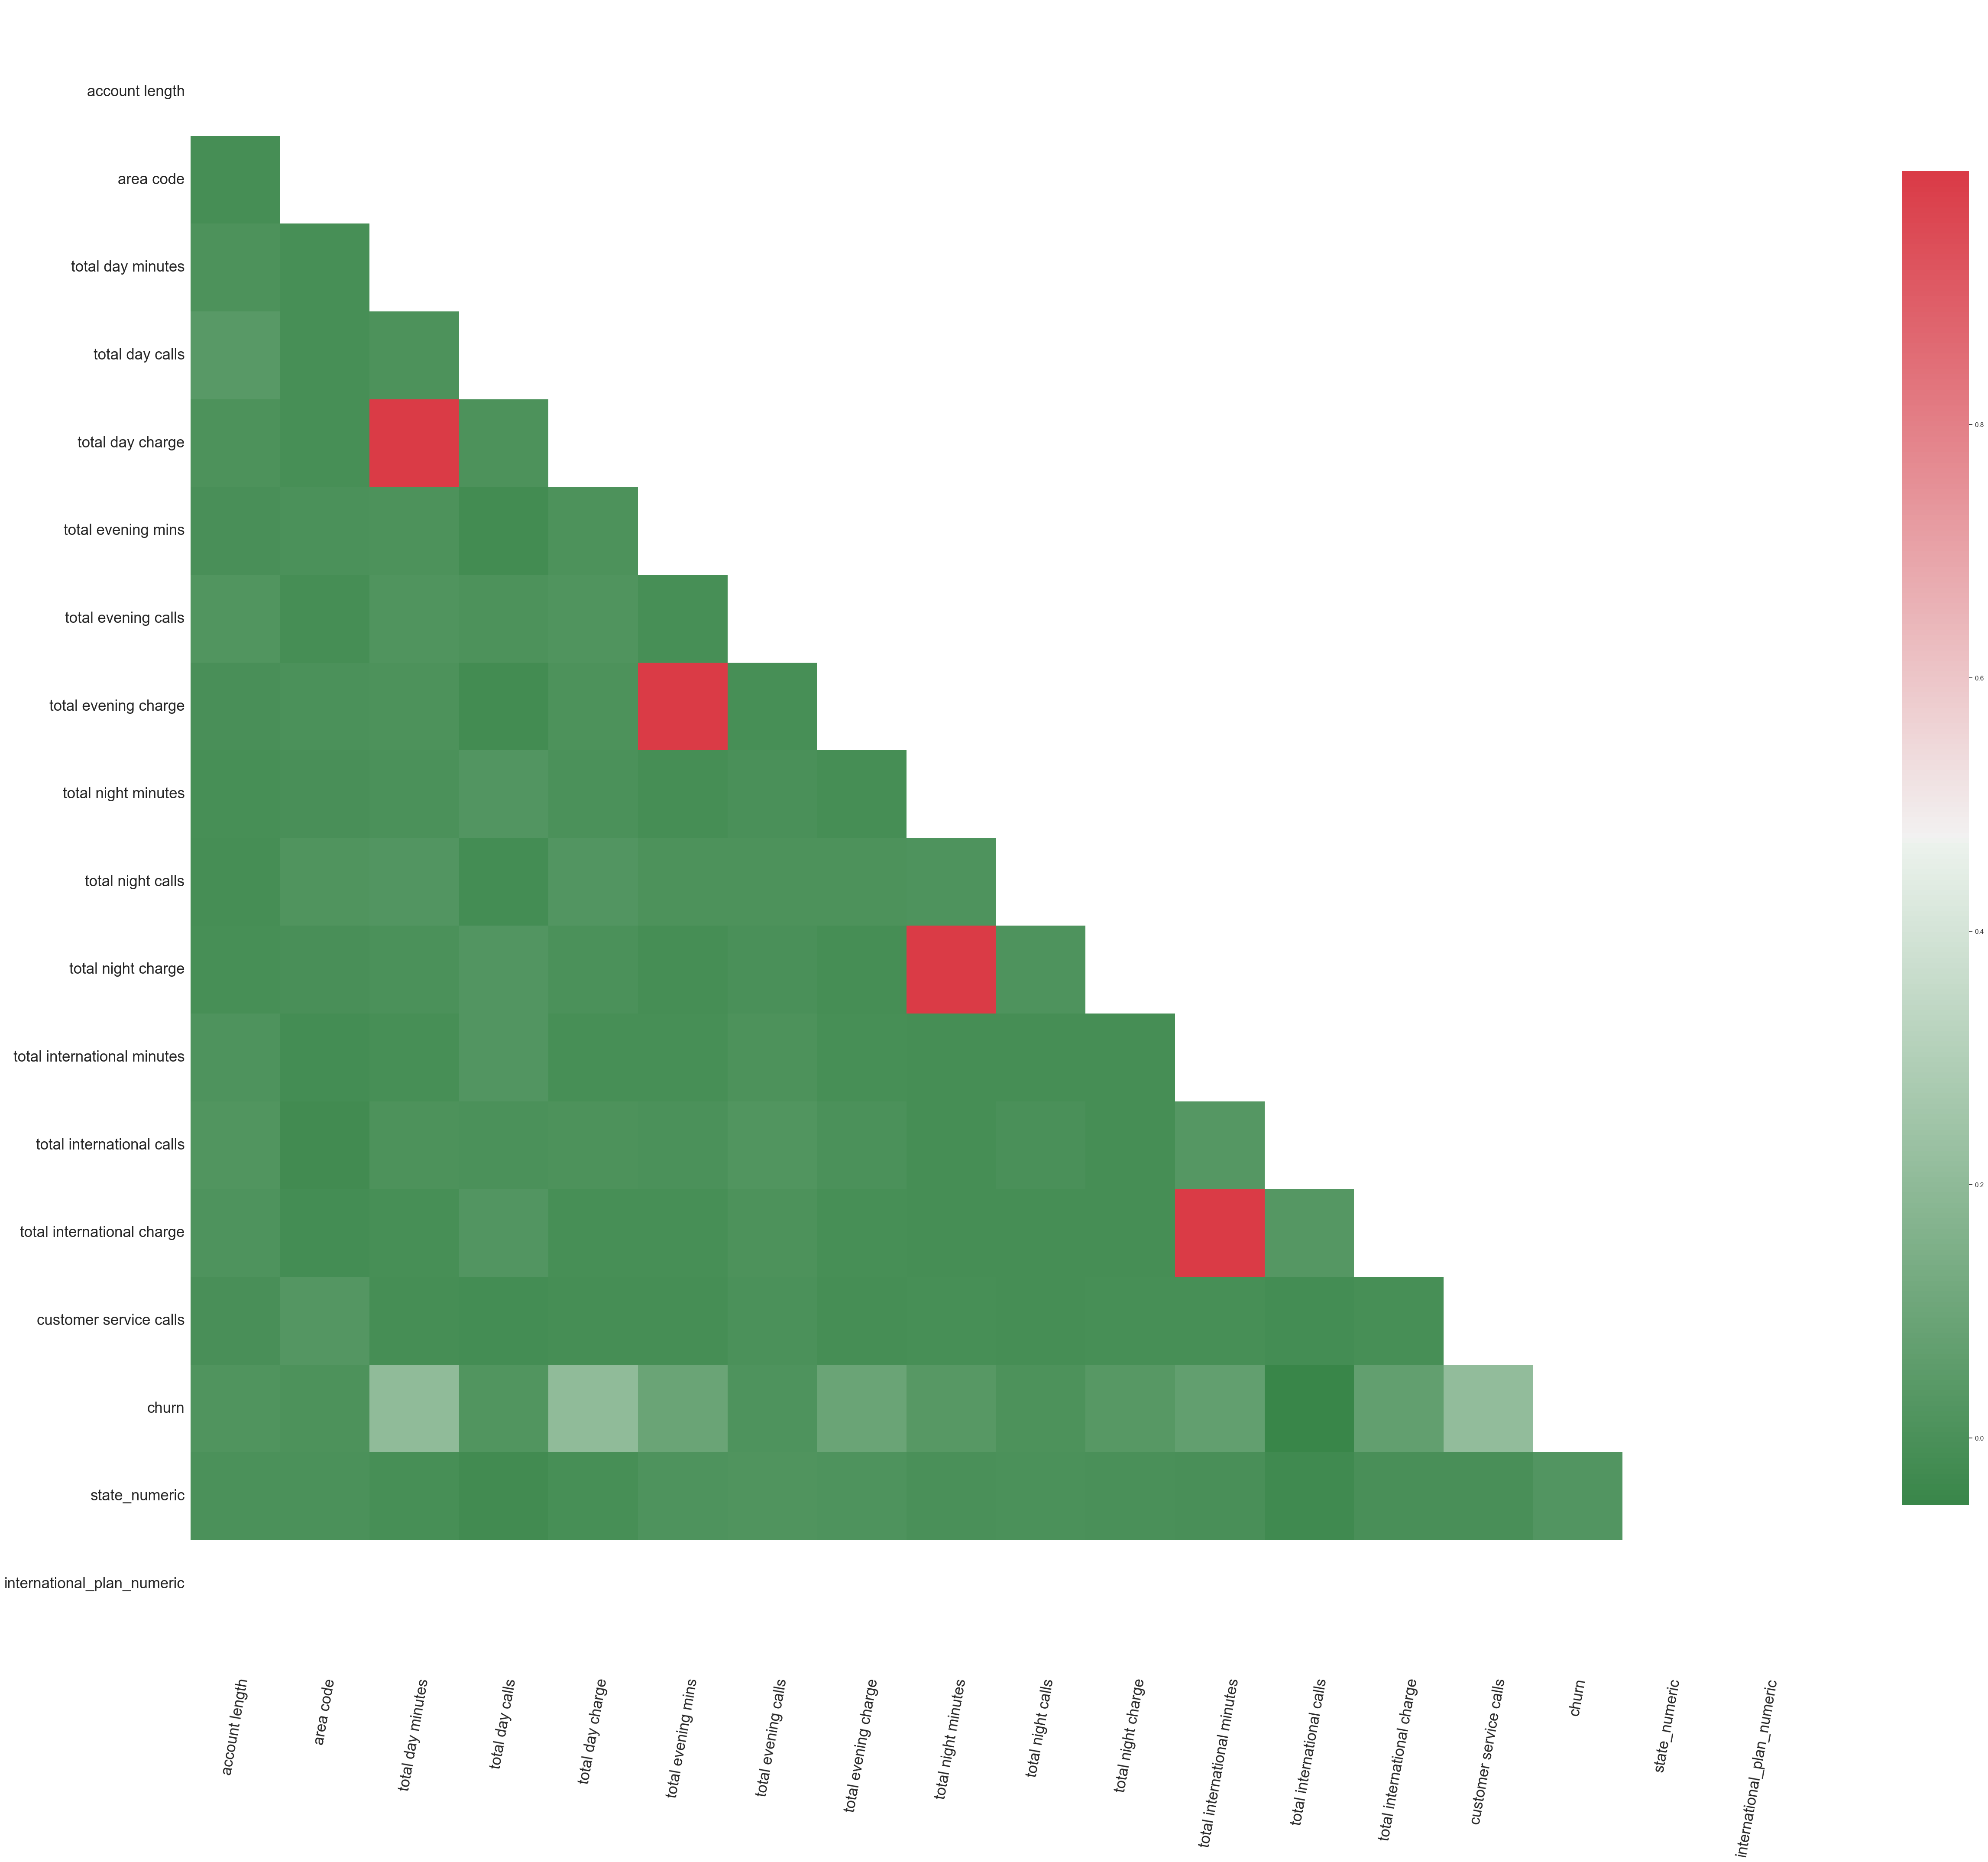

In [429]:
sns.set(style="white")
# Creating the data
data = df2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10, as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);


In [430]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   account length               3333 non-null   int64  
 1   area code                    3333 non-null   int64  
 2   total day minutes            3333 non-null   float64
 3   total day calls              3333 non-null   int64  
 4   total day charge             3333 non-null   float64
 5   total evening mins           3333 non-null   float64
 6   total evening calls          3333 non-null   int64  
 7   total evening charge         3333 non-null   float64
 8   total night minutes          3333 non-null   float64
 9   total night calls            3333 non-null   int64  
 10  total night charge           3333 non-null   float64
 11  total international minutes  3333 non-null   float64
 12  total international calls    3333 non-null   int64  
 13  total internationa

In [431]:
df2 = df2.drop('international_plan_numeric',axis=1)
df2

,account length,area code,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn,state_numeric
0,128,415,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,415,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,2
2,137,415,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,3
3,84,408,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,2
4,75,415,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,21
3329,68,415,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,9
3330,28,510,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,11
3331,184,510,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,50


In [432]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   account length               3333 non-null   int64  
 1   area code                    3333 non-null   int64  
 2   total day minutes            3333 non-null   float64
 3   total day calls              3333 non-null   int64  
 4   total day charge             3333 non-null   float64
 5   total evening mins           3333 non-null   float64
 6   total evening calls          3333 non-null   int64  
 7   total evening charge         3333 non-null   float64
 8   total night minutes          3333 non-null   float64
 9   total night calls            3333 non-null   int64  
 10  total night charge           3333 non-null   float64
 11  total international minutes  3333 non-null   float64
 12  total international calls    3333 non-null   int64  
 13  total internationa

## Feature Engineering

To reduce multicollinearity of features i did some feature engineering.

In [433]:
# Feature engineering
df2['total_minutes'] = df2['total day minutes'] + df2['total evening mins'] + df2['total night minutes'] + df2['total international minutes']
df2['total_charges'] = df2['total day charge'] + df2['total evening charge'] + df2['total night charge'] + df2['total international charge']

# Drop the original columns
df2 = df2.drop(['total day minutes', 'total evening mins', 'total night minutes', 'total international minutes',
              'total day charge', 'total evening charge', 'total night charge', 'total international charge'], axis=1)
df2.head()

,account length,area code,total day calls,total evening calls,total night calls,total international calls,customer service calls,churn,state_numeric,total_minutes,total_charges
0,128,415,110,99,91,3,1,0,1,717.2,75.56
1,107,415,123,103,103,3,1,0,2,625.2,59.24
2,137,415,114,110,104,5,0,0,3,539.4,62.29
3,84,408,71,88,89,7,2,0,2,564.8,66.80
4,75,415,113,122,121,3,3,0,4,512.0,52.09


In [434]:
df2.shape

(3333, 11)

We can plot another heatmap to confirm if there is still some collinearity.

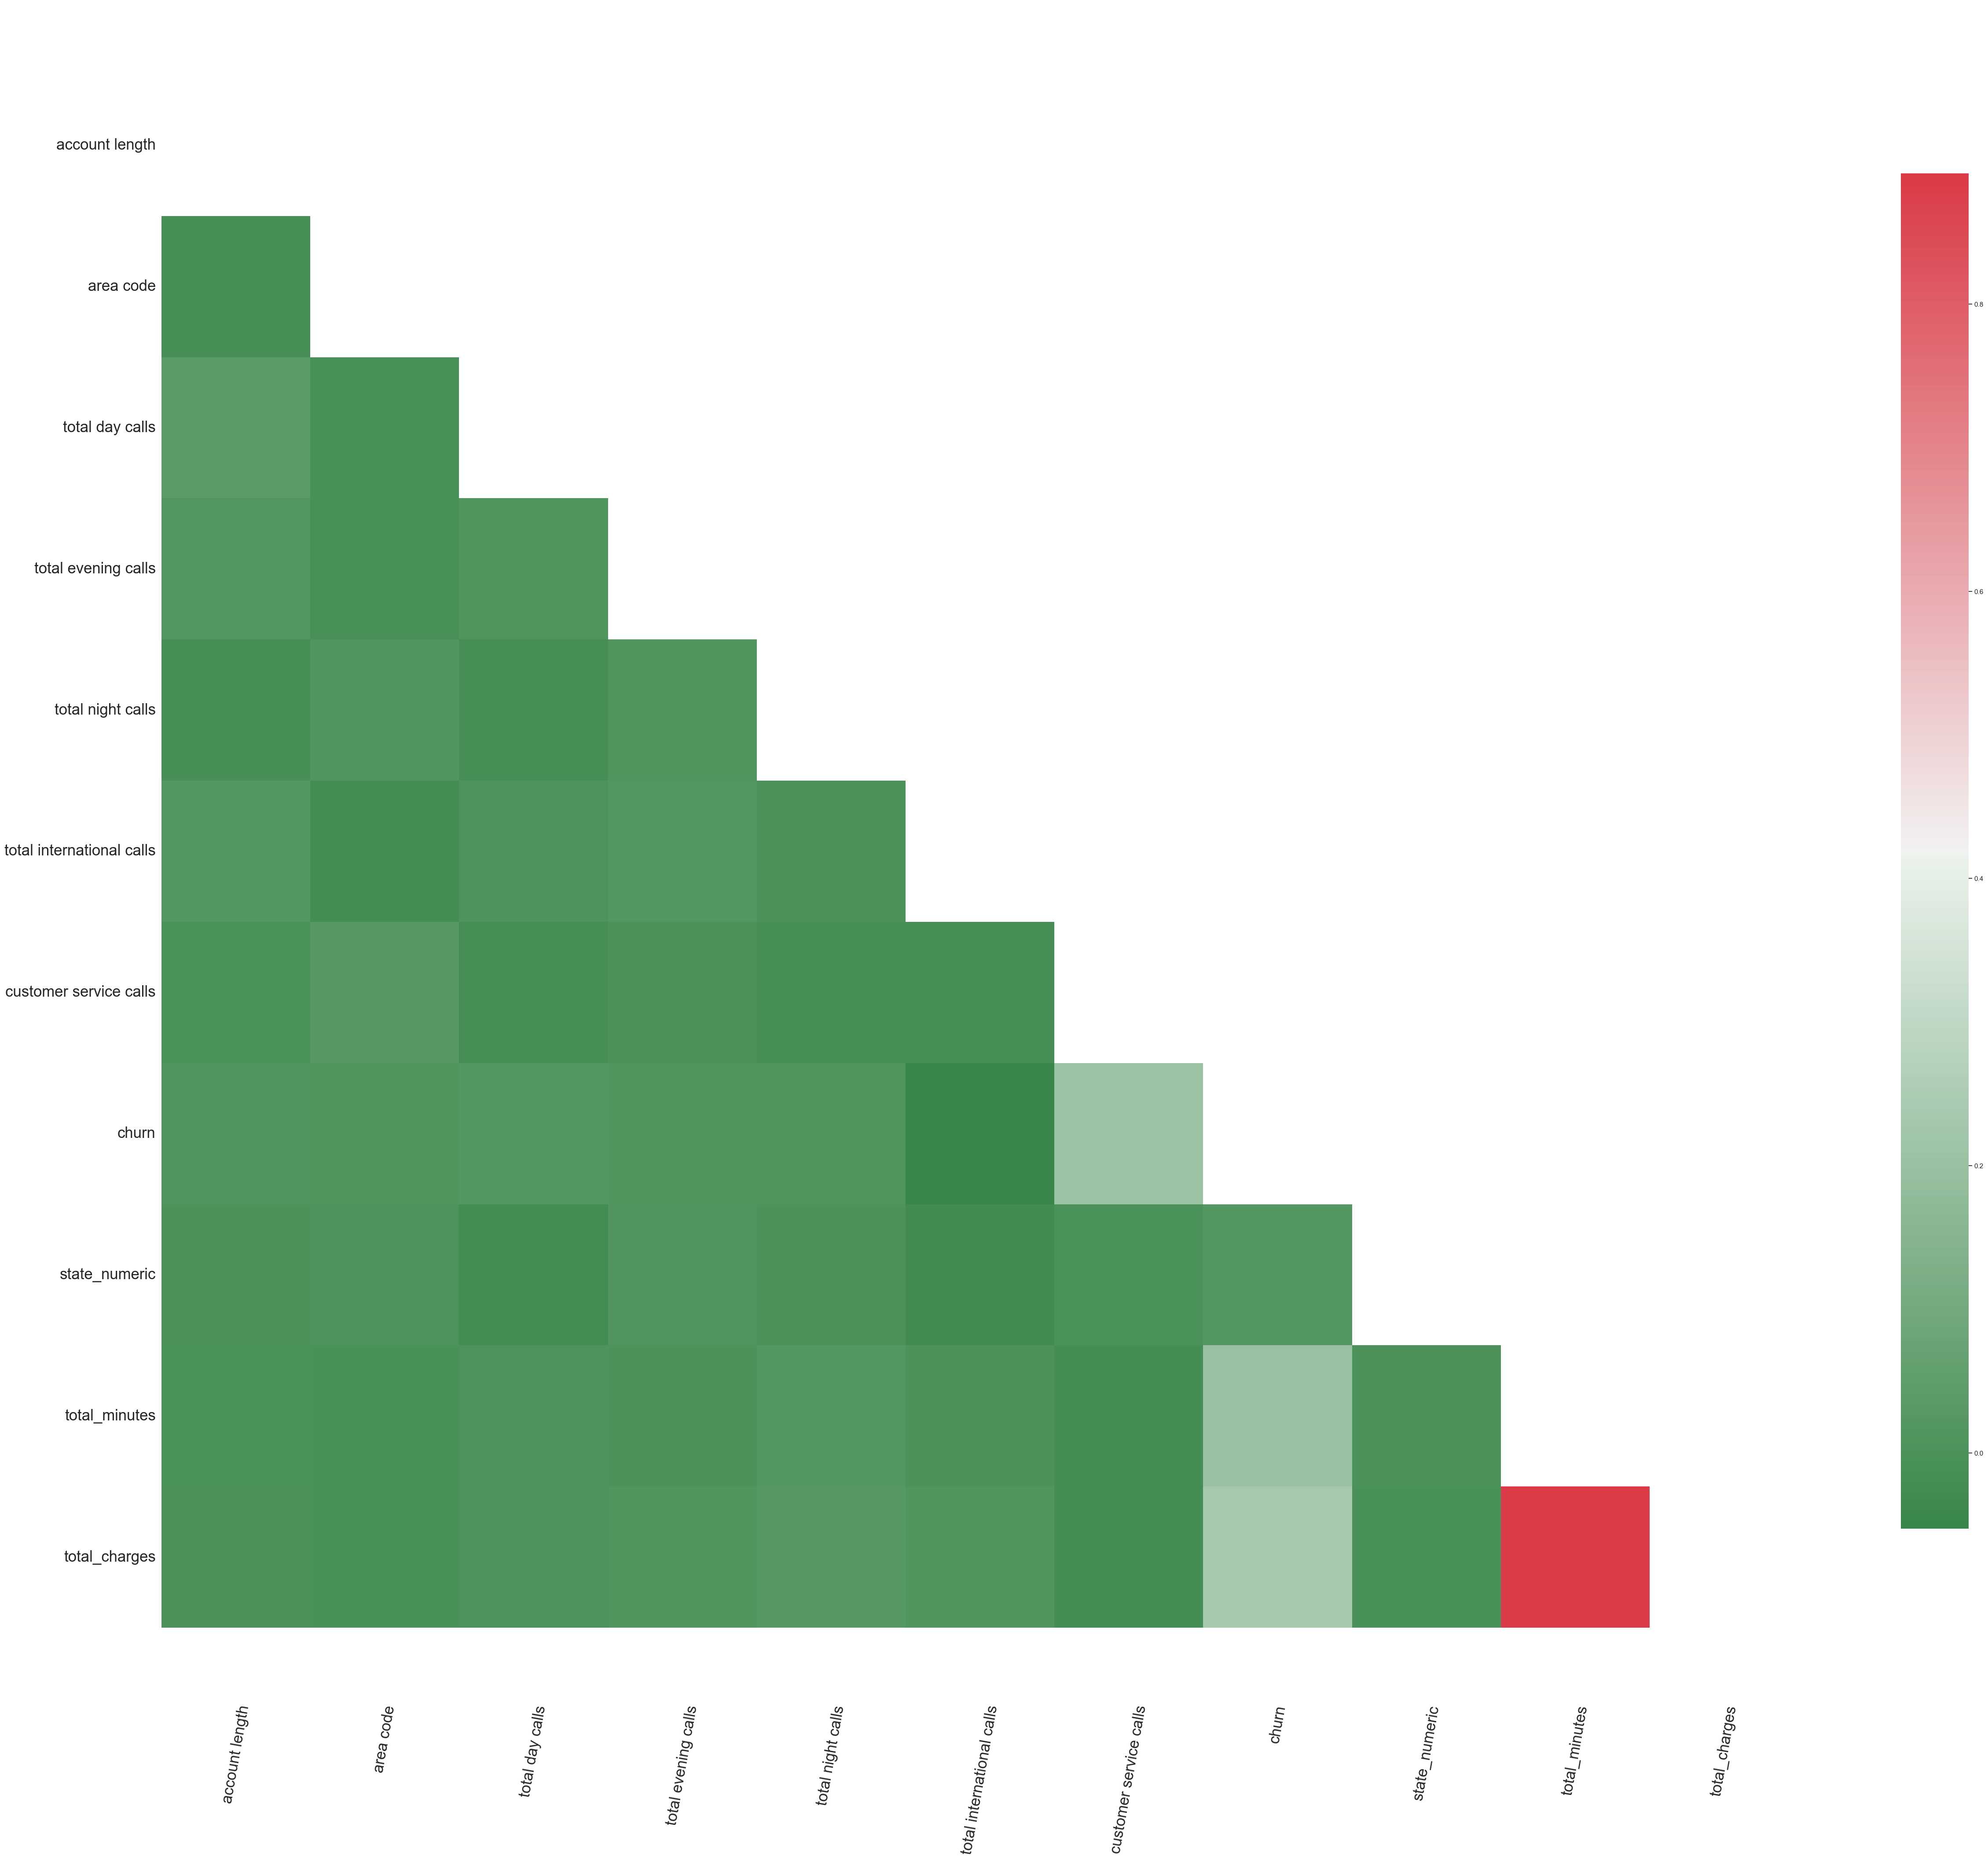

In [435]:
sns.set(style="white")
# Creating the data
data = df2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10, as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

Our model is now ready for modelling

## Perform Train Test split

We'll use a random state of 42 and stratify=y (ensures that the proportion of classes in the training set is similar to the proportion of classes in the entire dataset) in the train-test split. Recall that the target is churn

In [436]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into features (X) and target variable (y)
X = df2.drop("churn", axis=1)  
y = df2["churn"]

# Perform a train-test split
# stratify attribute because of class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [437]:
print("Train percent true churn:", y_train.value_counts(normalize=True)[1])
print("Test percent true churn: ", y_test.value_counts(normalize=True)[1])

Train percent true churn: 0.1448579431772709
Test percent true churn:  0.145083932853717


# Build and evaluate model

## Logistic Regression

Logistic Regression is a supervised learning algorithm that models the relationship between a set of input features and a binary outcome. It estimates the probability that a given input belongs to a certain class using the logistic function (also known as the sigmoid function), which maps any input to a value between 0 and 1



In [438]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit a Logistic Regression model
model = LogisticRegression(random_state=42)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Evaluate the model
# Predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Model Accuracy: 0.8513189448441247
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       713
           1       0.44      0.10      0.16       121

    accuracy                           0.85       834
   macro avg       0.65      0.54      0.54       834
weighted avg       0.80      0.85      0.81       834



Interpretation:

The model performs well in predicting the majority class ("False") with high precision (86%), recall (98%), and F1-Score (92%). However, the model struggles with the minority class ("True") with lower precision (44%), recall (10%), and F1-Score (16%). This indicates a potential issue with correctly identifying instances of the minority class.

Next Steps:

Consider addressing the class imbalance, as the lower performance on the minority class might be due to the imbalance. Explore techniques such as oversampling, undersampling, or using different evaluation metrics (e.g., area under the ROC curve) to better handle imbalanced datasets.

Fine-tune the model parameters or consider using different models to see if performance can be improved.

## KNN model

This is a supervised machine learning algorithm It's a non-parametric and instance-based learning method that makes predictions based on the similarity of data points. In kNN, the "k" refers to the number of nearest neighbors used to make a prediction.


In [439]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit a KNN model
knn_model = KNeighborsClassifier()
# Fit the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Evaluate the model
# Predictions on the testing set
y_pred_knn = knn_model.predict(X_test_scaled)

# Model accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn}")

# Classification report
report_knn = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", report_knn)

KNN Model Accuracy: 0.8764988009592326
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       713
           1       0.74      0.23      0.35       121

    accuracy                           0.88       834
   macro avg       0.81      0.61      0.64       834
weighted avg       0.86      0.88      0.85       834



Interpretation and next steps

The KNN model achieves an accuracy of 87.64%, indicating its overall ability to correctly predict outcomes. In terms of precision, the model demonstrates a satisfactory ability to accurately identify customers who will churn, with a precision of 74%. However, the recall is relatively lower at 23%, suggesting that the model might not capture all instances of actual churn. The F1-score, a balance of precision and recall, is at 35%. The classification report shows that the model performs better in identifying non-churn instances ("False") than churn instances ("True"). Considering the imbalanced nature of the classes, further optimization and exploration of hyperparameters or alternative algorithms may enhance model performance. Additionally, addressing class imbalance through techniques like oversampling or undersampling could be beneficial.

## Evaluation

Baseline model of logistic regression has an accuracy score of 85.13% ,Precision score 44% ,Recall 10% and F1_score of 16%. KNN model has an accuracy score 87.64%,Precision 74%,Recall 23% ,F1_score 35%. KNN model outperforms the baseline logistic regression model in terms of accuracy and several key metrics related to correctly identifying instances of churn (True class). The KNN model shows higher precision, recall, and F1_score for the positive class, indicating better performance in capturing actual instances of churn

## Model Validation

In [440]:
def compare_models_accuracy(model1, model2, X, y):
    """
    Compare two models using cross-validated accuracy.

    Parameters:
    - model1, model2: Instances of scikit-learn models
    - X: Feature matrix
    - y: Target variable

    Returns:
    - accuracy_model1, accuracy_model2: Accuracy values for each model
    """

    # Cross-validated accuracy for model 1
    accuracy_model1_cv = cross_val_score(model1, X, y, scoring="accuracy")
    accuracy_model1 = accuracy_model1_cv.mean()

    # Cross-validated accuracy for model 2
    accuracy_model2_cv = cross_val_score(model2, X, y, scoring="accuracy")
    accuracy_model2 = accuracy_model2_cv.mean()

    return accuracy_model1, accuracy_model2

# Example usage:
# Assuming baseline_model is your logistic regression model and knn_model is your KNN model
baseline_model = model
accuracy_baseline, accuracy_knn = compare_models_accuracy(baseline_model, knn_model, X_train, y_train)



In [441]:
print("Accuracy for Logistic Regression (Baseline):", accuracy_baseline)
print("Accuracy for KNN Model:", accuracy_knn)

Accuracy for Logistic Regression (Baseline): 0.8559406813627254
Accuracy for KNN Model: 0.8503382765531061


In [442]:
def compare_models_metrics(model1, model2, X, y, cv_splits=5, random_state=42):
    """
    Compare two models using various classification metrics.

    Parameters:
    - model1, model2: Instances of scikit-learn models
    - X: Feature matrix
    - y: Target variable
    - cv_splits: Number of cross-validation splits (default is 5)
    - random_state: Random seed for reproducibility (default is 42)

    Returns:
    - Dictionary containing metric values for each model
    """

    metrics = {
        'precision': [],
        'recall': [],
        'f1_score': [],
        'roc_auc': [],
        'roc_curve': None  # To store ROC curves
    }

    # Set up cross-validation
    y_pred_model1 = cross_val_predict(model1, X, y, cv=cv_splits, method='predict_proba')[:, 1]
    y_pred_model2 = cross_val_predict(model2, X, y, cv=cv_splits, method='predict_proba')[:, 1]

    # Calculate metrics
    metrics['precision'].append(precision_score(y, y_pred_model1.round()))
    metrics['recall'].append(recall_score(y, y_pred_model1.round()))
    metrics['f1_score'].append(f1_score(y, y_pred_model1.round()))
    metrics['roc_auc'].append(roc_auc_score(y, y_pred_model1))
    
    # Calculate ROC curve
    fpr_model1, tpr_model1, _ = roc_curve(y, y_pred_model1)
    metrics['roc_curve'] = {'fpr_model1': fpr_model1, 'tpr_model1': tpr_model1}

    metrics['precision'].append(precision_score(y, y_pred_model2.round()))
    metrics['recall'].append(recall_score(y, y_pred_model2.round()))
    metrics['f1_score'].append(f1_score(y, y_pred_model2.round()))
    metrics['roc_auc'].append(roc_auc_score(y, y_pred_model2))
    
    # Calculate ROC curve
    fpr_model2, tpr_model2, _ = roc_curve(y, y_pred_model2)
    metrics['roc_curve']['fpr_model2'] = fpr_model2
    metrics['roc_curve']['tpr_model2'] = tpr_model2

    return metrics

Precision for Logistic Regression (Baseline): 0.5333333333333333
Recall for Logistic Regression (Baseline): 0.04419889502762431
F1 Score for Logistic Regression (Baseline): 0.08163265306122448
ROC AUC for Logistic Regression (Baseline): 0.7112671504691092

Precision for KNN Model: 0.44545454545454544
Recall for KNN Model: 0.13535911602209943
F1 Score for KNN Model: 0.2076271186440678
ROC AUC for KNN Model: 0.6085646993125593


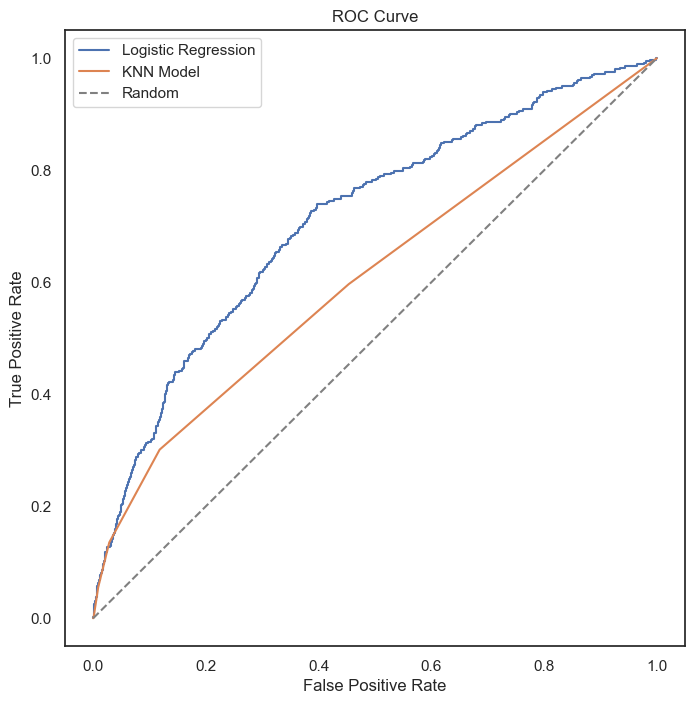

In [443]:
# Assuming baseline_model is your logistic regression model and knn_model is your KNN model
metrics = compare_models_metrics(baseline_model, knn_model, X_train, y_train)

# Print the metric values
print("Precision for Logistic Regression (Baseline):", metrics['precision'][0])
print("Recall for Logistic Regression (Baseline):", metrics['recall'][0])
print("F1 Score for Logistic Regression (Baseline):", metrics['f1_score'][0])
print("ROC AUC for Logistic Regression (Baseline):", metrics['roc_auc'][0])

print("\nPrecision for KNN Model:", metrics['precision'][1])
print("Recall for KNN Model:", metrics['recall'][1])
print("F1 Score for KNN Model:", metrics['f1_score'][1])
print("ROC AUC for KNN Model:", metrics['roc_auc'][1])

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(metrics['roc_curve']['fpr_model1'], metrics['roc_curve']['tpr_model1'], label='Logistic Regression')
plt.plot(metrics['roc_curve']['fpr_model2'], metrics['roc_curve']['tpr_model2'], label='KNN Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Interpretation

Logistic Regression has the best ROC Curve as it consistently lies higher above the diagonal line compared to the other curves, indicating better performance in distinguishing between the positive and negative classes. The larger area under the ROC curve (AUC) for the Logistic Regression suggests that it has a better balance between true positive rate (sensitivity) and false positive rate, making it the most effective model in terms of discrimination and classification performance.

We will use Logistic regression on the final model because it offers a clear and easy-to-understand framework for understanding the impact of each independent feature on the likelihood of churn. Coefficients and odds ratios offer insights into the direction and strength of relationships.

## Hyperparameter Tuning

In the version 2 model, we make use of hyperparameter tuning.

As logistic regression does not really have any critical hyperparameters to tune, sometimes, hypertuning with different solvers, use of regularization  and use of the C parameter can lead to differences in performance/convergence in the model.
We also utilize GridSearch technique to find the optimal parameter values from the set defined in the grid. We also use 'RepeatedStratifiedKFold' for cross validation instead of GridSearchCV's default 

We will be undersampling the majority class.

In [444]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold

# Define the pipeline with preprocessing and Logistic Regression (no undersampling in the pipeline)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('logreg', LogisticRegression())  # Logistic Regression model
])

# Define the hyperparameter grid for grid search
param_grid = {
    'logreg__solver': ['liblinear', 'lbfgs'],  # Different solvers to try
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter (C)
    'logreg__penalty': ['l1', 'l2']  # Regularization penalty type
}

# Undersample the data outside the pipeline (before GridSearchCV)
X_train_under, y_train_under = RandomUnderSampler(sampling_strategy='auto', random_state=42).fit_resample(X_train, y_train)

# Create the GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Fit the grid search to the undersampled data
grid_search.fit(X_train_under, y_train_under)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model for prediction on new data
y_pred = grid_search.predict(X_test)

# ... (rest of your code for evaluation and analysis)



Best Parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best Accuracy: 0.687816091954023


## Evaluation of the final model

In [445]:
# Create the final logistic regression model with the best hyperparameters
final_logreg_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(C=100, penalty='l2'))
])
# Undersample the data outside the pipeline (before GridSearchCV)
X_train_under, y_train_under = RandomUnderSampler(sampling_strategy='auto', random_state=42).fit_resample(X_train, y_train)
# Fit the final model on the entire training set
final_logreg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = final_logreg_model.predict(X_test)

# Evaluate the final model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Final Model Accuracy on Test Set:", accuracy_test)

# Classification report on the test set
report_test = classification_report(y_test, y_pred_test)
print("Final Model Classification Report on Test Set:\n", report_test)

Final Model Accuracy on Test Set: 0.8525179856115108
Final Model Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       713
           1       0.46      0.11      0.17       121

    accuracy                           0.85       834
   macro avg       0.67      0.54      0.55       834
weighted avg       0.81      0.85      0.81       834



After tuning with the best hyperparameters, final tuned logistic model identified through grid search achieved an accuracy of 85.25% on the test set.This indicates that a relatively simple model like the baseline logistic regression or KNN was sufficient for this specific task. The additional effort of hyperparameter tuning for the final logistic regression model might did not yield significant improvement in overall accuracy.

In [446]:
# Retrieve coefficients and feature names
logreg_model = final_logreg_model.named_steps['logreg']
coefficients = logreg_model.coef_[0]
feature_names = X_train.columns

# Create a dictionary to store feature names and their corresponding coefficients
coefficients_dict = dict(zip(feature_names, coefficients))

# Display the coefficients
for feature, coef in coefficients_dict.items():
    print(f"{feature}: {coef}")

account length: 0.04406680100964616
area code: -0.014827871055450014
total day calls: 0.07721246859977535
total evening calls: 0.020802304471735058
total night calls: 0.009719186581037648
total international calls: -0.2560426518068946
customer service calls: 0.6310226818581129
state_numeric: 0.11270664940228335
total_minutes: -0.1249935525801169
total_charges: 0.8456586225882734


The coefficients above provide insights into how each feature contributes to the prediction. These insights suggest that since "total_charges" has the highest positive feature importance, it's the most influential factor in predicting churn according to this model. This suggests that customers with high total charges are more likely to churn. 

### Recommendations

1. Pricing strategies to address charges on products and services offered by SyriaTel

2. SyriaTel needs to look into operations in states such as Texas and Maryland that exhibited higher churn rates.

3. Gather information on why customers frequently call the customer care service.

4. Provide clear and comprehensive information through self-service options to reduce the necessity for contacting customer service.

### Next Steps